<a href="https://colab.research.google.com/github/wanjiku-wairimu1/NLP/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
url = 'https://en.wikipedia.org/wiki/Data_science'

In [31]:
#Step 1: Getting the Data
#First step in every data science process is getting the data. We will use requests library to do that:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-featur

In [32]:
#Step 2: Transforming the Data
# convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.
#Using the simplest built-in HTML sub-parser object from python,we subclass the HTML sub-parser class and define the code that will collect all the text from the HTML tags, except <script> and <style> tags
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])



 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations 
				Toggle Foundations subsection
			 1.1 Relationship to statistics 2 Etymology 
				Toggle Etymology subsection
			 2.1 Early usage 2.2 Modern usage 3 See also 4 References 
						Toggle the table of contents
					 Toggle the table of contents Data science 44 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français 한국어 Հայերեն हिन्दी Bahasa Indonesia Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Mela

In [33]:
#STEP 3 GETTING INSIGHTS
#Extract keywords from text and see which keywords are more meaningful
# use python library RAKE for keyword extraction
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
#min len of keyword=5, min freq=3, max no.of words =2
import nlp_rake
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res= extractor.apply(text)
res



[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data science', 3.912280701754386),
 ('information science', 3.912280701754386),
 ('computer science', 3.912280701754386),
 ('^ davenport', 3.8),
 ('data analysis', 3.666666666666667),
 ('science', 1.912280701754386),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('thomas', 1.2),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

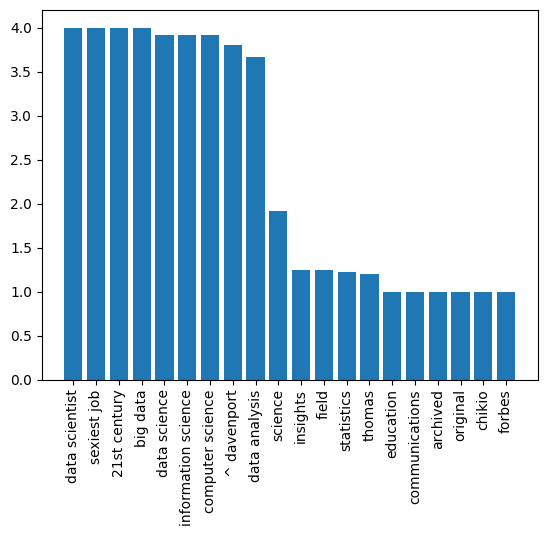

In [35]:
# STEP 4 VISUALIZING THE RESULT
import matplotlib.pyplot as plt

def plot(pair_list):
  k,v = zip(*pair_list)
  plt.bar(range(len(k)), v)
  plt.xticks(range(len(k)),k, rotation='vertical')
  plt.show()

plot(res)

In [36]:
#A better way to visualize word frequencies is word cloud
# the word cloud object takes in either the original text, or a pre computed list of words with their frequencies and returning an image which can then be visualized using matplotlib
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


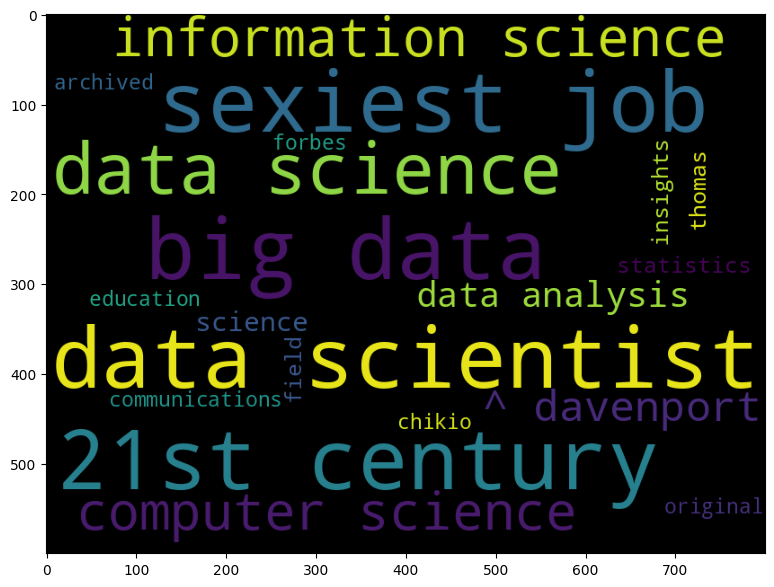

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(background_color='black', width=800, height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))

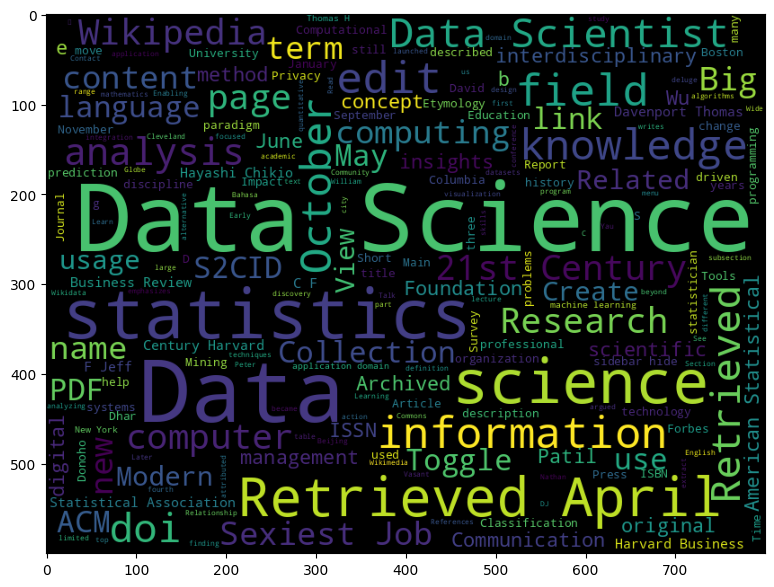

In [43]:
#if we pass the original text from the wordcloud
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))